In [51]:
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
data = pd.read_csv('HomeC-2.csv')

/Users/fabiomontello/opt/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Un riassunto dei dati, per cercare anomalie.

In [3]:
data.iloc[:,:9].describe()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW]
count,5.039100e+05,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,1.451876e+09,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556
std,1.454664e+05,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199
min,1.451624e+09,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067
25%,1.451750e+09,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083
50%,1.451876e+09,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433
75%,1.452002e+09,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417
max,1.452128e+09,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267


In [4]:
data.iloc[:,9:18].describe()

,Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW]
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.042137,0.014139,0.002755,0.007023,0.000009,0.058530,0.015642,0.010983,0.035313
std,0.057967,0.014292,0.021860,0.076740,0.000010,0.202706,0.137841,0.098859,0.096056
min,0.000017,0.000017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007133,0.012733,0.000500,0.000017,0.000000,0.029833,0.000983,0.003617,0.001483
50%,0.008083,0.012933,0.000667,0.000050,0.000017,0.031317,0.001000,0.004000,0.001617
75%,0.053192,0.013100,0.000750,0.000167,0.000017,0.032883,0.001017,0.004067,0.001750
max,1.273933,1.088983,1.166583,2.262583,0.000183,7.027900,1.633017,1.929800,0.465217


In [5]:
data.iloc[:,18:27].describe()

,Solar [kW],temperature,humidity,visibility,apparentTemperature,pressure,windSpeed
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.076229,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936
std,0.128428,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716
min,0.000000,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000
25%,0.003367,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000
50%,0.004283,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000
75%,0.083917,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000
max,0.613883,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000


In [6]:
data.iloc[:,27:36].describe()

,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000
mean,202.356843,0.002598,38.694013,0.056453
std,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,-27.240000,0.000000
25%,148.000000,0.000000,24.600000,0.000000
50%,208.000000,0.000000,39.030000,0.000000
75%,295.000000,0.000000,54.790000,0.000000
max,359.000000,0.191000,75.490000,0.840000


Le colonne "use" e "House overall" hanno esattamente gli stessi dati.
Questo è vero anche per le colonne "solar" e "gen"

In [7]:
data['use [kW]'].equals(data['House overall [kW]'])

True

In [8]:
data['Solar [kW]'].equals(data['gen [kW]'])

True

I valori di totale consumo della casa sono diversi dalla somma dei singoli valori di tutti gli apparecchi che consumano. Inoltre non sempre il totale dei valori di consumo della casa è maggiore del totale dei singoli valori (quindi assumendo che ci siano altri dispositivi nella casa di cui non siamo a conoscenza). Circa un quarto della somma dei valori dei singoli dispositivi supera il valore totale dichiarato.  

In [9]:
data.iloc[:,4:18].sum(axis=1)

0         0.708017
1         0.711500
2         0.711550
3         0.803983
4         0.929017
            ...   
503905    0.835600
503906    0.836433
503907    1.167200
503908    1.223067
503909    1.235350
Length: 503910, dtype: float64

In [10]:
data['House overall [kW]'].equals(data.iloc[:,4:18].sum(axis=1))

False

In [11]:
df = pd.DataFrame()
df['overall'] = data['House overall [kW]']

In [12]:
df['sum'] = data.iloc[:,4:19].sum(axis=1)

In [13]:
df.head(20)

,overall,sum
0,0.932833,0.711500
1,0.934333,0.714967
2,0.931817,0.715017
3,1.022050,0.807467
4,1.139400,0.932483
5,1.391867,1.198283
6,1.366217,1.190617
7,1.431900,1.285033
8,1.627300,1.439033
9,1.735383,1.477350


In [14]:
df.loc[df['overall'] < df['sum']].count()

overall    129564
sum        129564
dtype: int64

In [15]:
df.count()

overall    503910
sum        503910
dtype: int64

Un occhio agli istogrammi per cercare di capire se c'è qualcosa di anomalo o outliers nei dati

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a3ff950>,
      dtype=object)

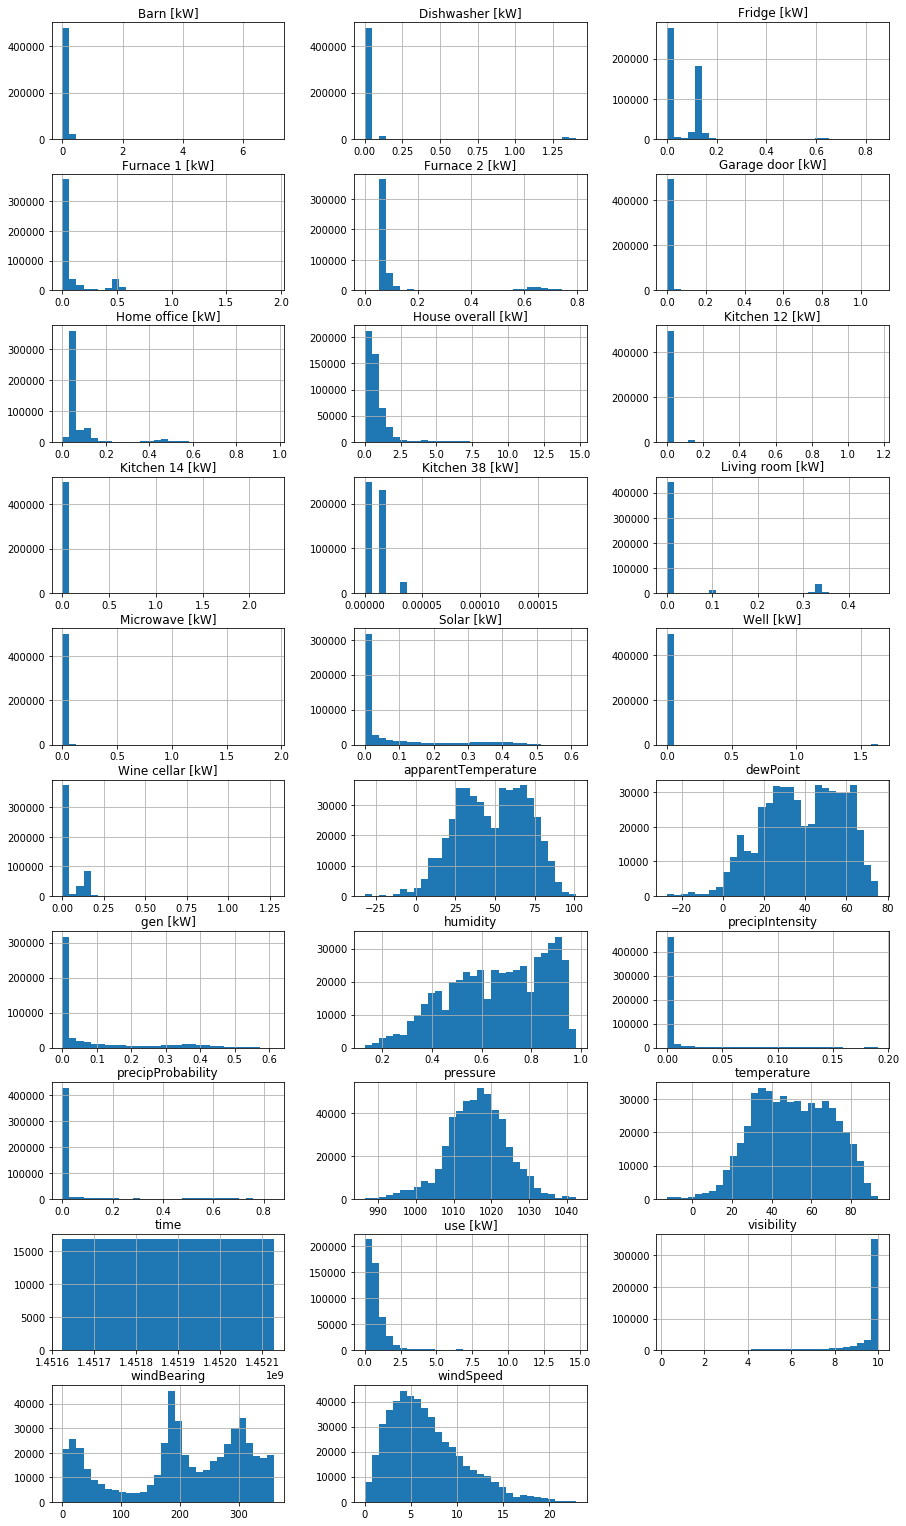

In [16]:
data.hist(bins=30, figsize=(15,30), layout=(11,3))

Ricerca dei NaN o di valori anomali

In [17]:
data.isin(['Nan']).any()

time                   False
use [kW]               False
gen [kW]               False
House overall [kW]     False
Dishwasher [kW]        False
Furnace 1 [kW]         False
Furnace 2 [kW]         False
Home office [kW]       False
Fridge [kW]            False
Wine cellar [kW]       False
Garage door [kW]       False
Kitchen 12 [kW]        False
Kitchen 14 [kW]        False
Kitchen 38 [kW]        False
Barn [kW]              False
Well [kW]              False
Microwave [kW]         False
Living room [kW]       False
Solar [kW]             False
temperature            False
icon                   False
humidity               False
visibility             False
summary                False
apparentTemperature    False
pressure               False
windSpeed              False
cloudCover             False
windBearing            False
precipIntensity        False
dewPoint               False
precipProbability      False
dtype: bool

In [18]:
data.dtypes

time                     int64
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing              int64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

La colonna CloudCover ha i primi 58 valori settati a 'cloudCover'. Li ho settati come None e cambiato tutta la colonna a float anziché mista. Da valutare se teneri i None o eliminare semplicemente i dati.

In [19]:
data.loc[data['cloudCover']  == 'cloudCover', ['cloudCover']]

,cloudCover
0,cloudCover
1,cloudCover
2,cloudCover
3,cloudCover
4,cloudCover
5,cloudCover
6,cloudCover
7,cloudCover
8,cloudCover
9,cloudCover


In [20]:
data.loc[data['cloudCover']  == 'cloudCover', ['cloudCover']] = None

In [21]:
data['cloudCover'] = data['cloudCover'].astype(float)
data['cloudCover'].unique()

array([ nan, 0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21,
       0.15, 0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09,
       0.12, 0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03,
       0.07, 0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 ,
       0.77, 0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33,
       0.6 , 0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61,
       0.38, 0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64,
       0.59])

In [22]:
len(data.loc[:, (data.dtypes == 'float64') | (data.dtypes == 'int64')].columns)

30

In [23]:
data.corr()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,1.000000,-0.002421,-0.033894,-0.002421,-0.005089,-0.201062,-0.152153,0.028826,0.048295,0.136879,...,0.247718,-0.080816,0.233682,0.141599,-0.122433,0.027582,0.014112,0.010671,0.315764,0.009284
use [kW],-0.002421,1.000000,-0.131635,1.000000,0.196272,0.314776,0.489414,0.147520,0.149223,0.124506,...,0.011511,-0.002609,0.005560,0.010730,-0.003853,-0.033506,0.011183,0.024836,0.016040,-0.003317
gen [kW],-0.033894,-0.131635,1.000000,-0.131635,0.038204,-0.020461,-0.107684,-0.085421,-0.002862,0.062430,...,0.007608,-0.017650,0.093793,-0.000222,-0.056554,0.000782,-0.007882,0.030447,0.089664,0.041192
House overall [kW],-0.002421,1.000000,-0.131635,1.000000,0.196272,0.314776,0.489414,0.147520,0.149223,0.124506,...,0.011511,-0.002609,0.005560,0.010730,-0.003853,-0.033506,0.011183,0.024836,0.016040,-0.003317
Dishwasher [kW],-0.005089,0.196272,0.038204,0.196272,1.000000,0.002023,-0.008349,0.065525,0.034020,-0.004619,...,-0.001868,-0.008064,-0.014547,0.000211,-0.001672,-0.002361,0.004016,0.006265,-0.016099,0.008189
Furnace 1 [kW],-0.201062,0.314776,-0.020461,0.314776,0.002023,1.000000,0.240445,-0.019692,-0.042511,-0.096036,...,-0.049854,-0.034729,-0.308621,-0.000283,0.092136,0.010399,0.025631,0.009164,-0.301091,0.000344
Furnace 2 [kW],-0.152153,0.489414,-0.107684,0.489414,-0.008349,0.240445,1.000000,-0.008555,-0.032574,-0.052272,...,-0.037408,-0.013126,-0.242814,-0.001532,0.072600,0.005556,0.031912,0.022545,-0.233404,0.007913
Home office [kW],0.028826,0.147520,-0.085421,0.147520,0.065525,-0.019692,-0.008555,1.000000,0.035013,0.003896,...,-0.006008,0.020638,0.010856,0.027091,-0.017898,-0.040248,0.012427,-0.029890,0.007594,-0.032861
Fridge [kW],0.048295,0.149223,-0.002862,0.149223,0.034020,-0.042511,-0.032574,0.035013,1.000000,0.076183,...,0.030749,0.009019,0.107064,-0.000517,-0.024886,-0.023428,-0.008589,0.014253,0.115169,0.004794
Wine cellar [kW],0.136879,0.124506,0.062430,0.124506,-0.004619,-0.096036,-0.052272,0.003896,0.076183,1.000000,...,0.055541,0.030095,0.288882,0.018494,-0.052860,-0.040546,-0.025930,0.016588,0.298207,0.006571


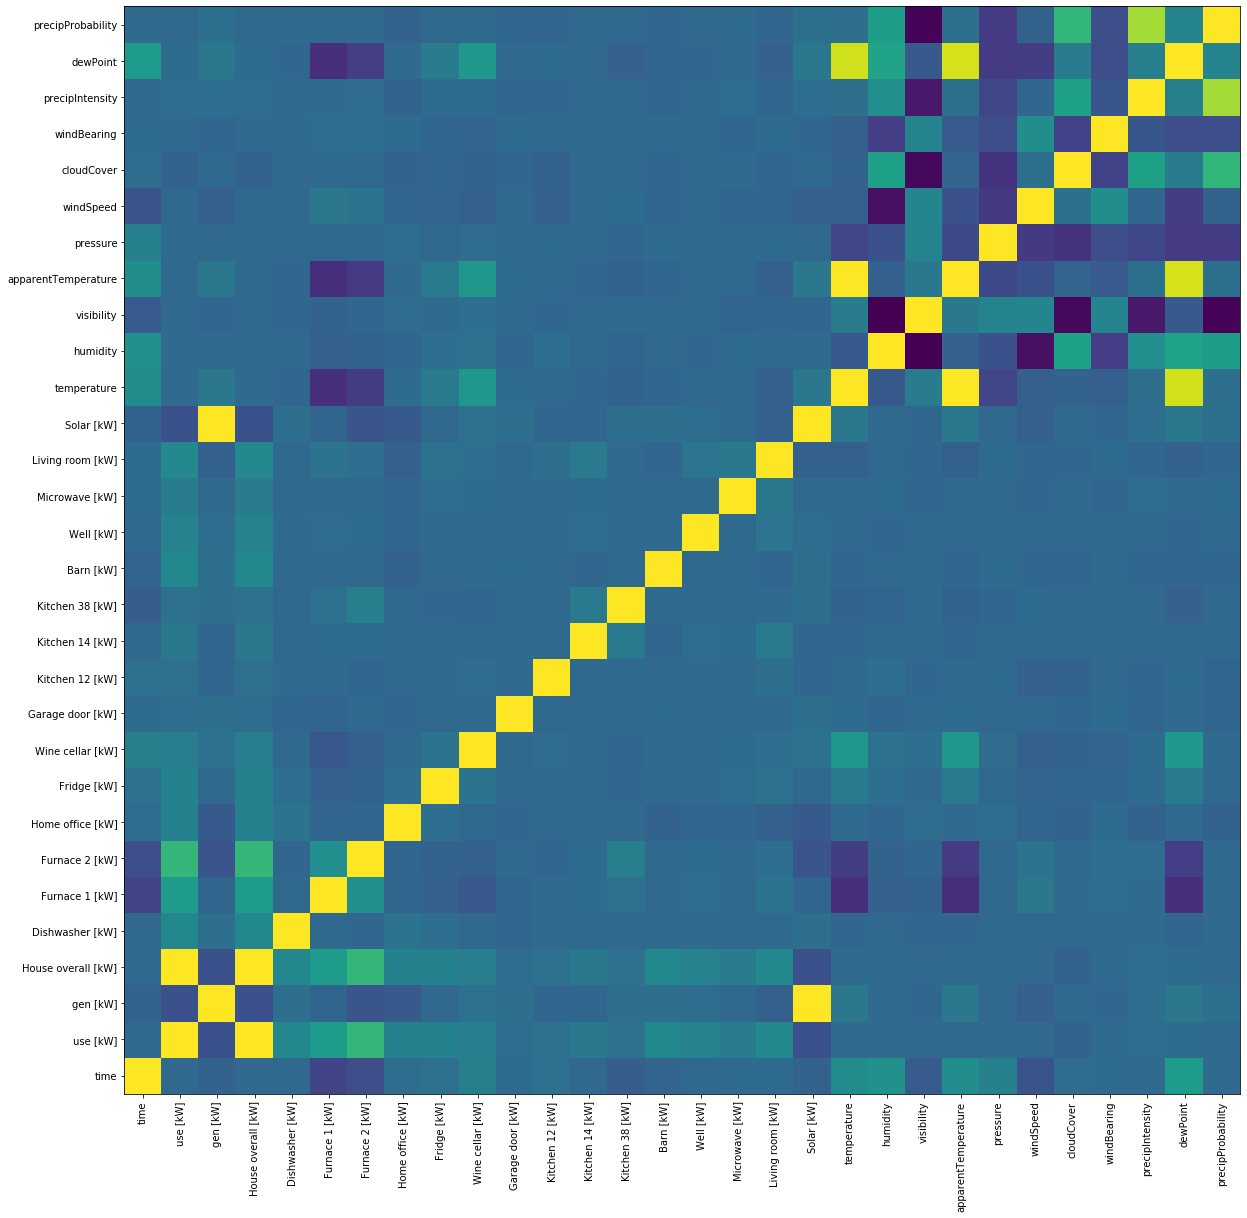

In [25]:
plt.figure(figsize = (20,20))

# sns.heatmap(data.corr(), annot=False, fmt="g", cmap='viridis')
# fig.show()
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
labels = data.loc[:, (data.dtypes == 'float64') | (data.dtypes == 'int64')].columns
plt.pcolor(data.corr())
plt.yticks(np.arange(0.5, len(labels), 1), labels)
plt.xticks(np.arange(0.5, len(labels), 1), labels, rotation='vertical')
plt.show()

In [31]:
clean_data = data.copy()
clean_data = clean_data.iloc[58:,]
# clean_data['Furnace [kW]']  = clean_data['Furnace 1 [kW]'].values \
#                             + clean_data['Furnace 2 [kW]'].values
    
# clean_data['Kitchen [kW]']  = clean_data['Kitchen 38 [kW]'].values \
#                             + clean_data['Kitchen 14 [kW]'].values \
#                             + clean_data['Kitchen 12 [kW]'].values


# , \
#                                       'Furnace 2 [kW]', 'Furnace 1 [kW]', \
#                                       'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]', \
#                                       'windBearing','dewPoint','precipProbability', 'visibility',\

clean_data = clean_data.drop(columns=['House overall [kW]', 'Solar [kW]',\
                                      'use [kW]', 'apparentTemperature',\
                                      'summary', 'icon','cloudCover'])

clean_data['use [kW]'] = clean_data['Dishwasher [kW]'].values \
                        + clean_data['Home office [kW]'].values \
                        + clean_data['Fridge [kW]'].values \
                        + clean_data['Wine cellar [kW]'].values \
                        + clean_data['Barn [kW]'].values \
                        + clean_data['Well [kW]'].values \
                        + clean_data['Microwave [kW]'].values \
                        + clean_data['Living room [kW]'].values \
                        + clean_data['Furnace 1 [kW]'].values \
                        + clean_data['Furnace 2 [kW]'].values \
                        + clean_data['Kitchen 38 [kW]'].values \
                        + clean_data['Kitchen 14 [kW]'].values \
                        + clean_data['Kitchen 12 [kW]'].values \

In [32]:
cols = clean_data.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]

In [33]:
clean_data = clean_data[cols]

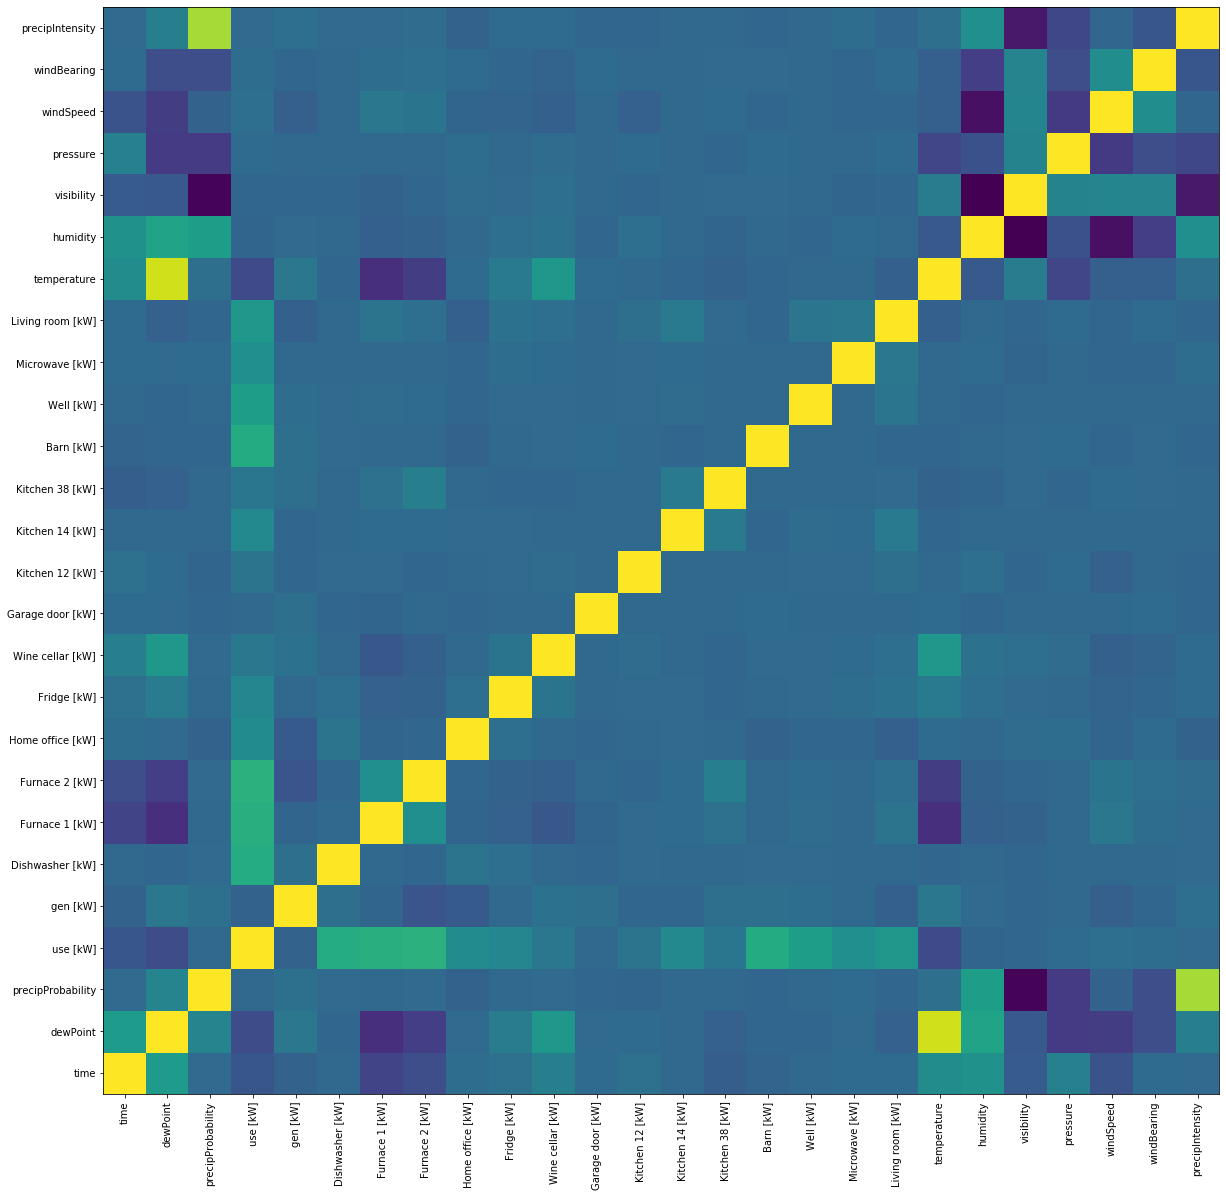

In [34]:
plt.figure(figsize = (20,20))

# sns.heatmap(data.corr(), annot=False, fmt="g", cmap='viridis')
# fig.show()
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
labels = clean_data.loc[:, (clean_data.dtypes == 'float64') | (clean_data.dtypes == 'int64')].columns
plt.pcolor(clean_data.corr())
plt.yticks(np.arange(0.5, len(labels), 1), labels)
plt.xticks(np.arange(0.5, len(labels), 1), labels, rotation='vertical')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a45ed2d50>,
      dtype=object)

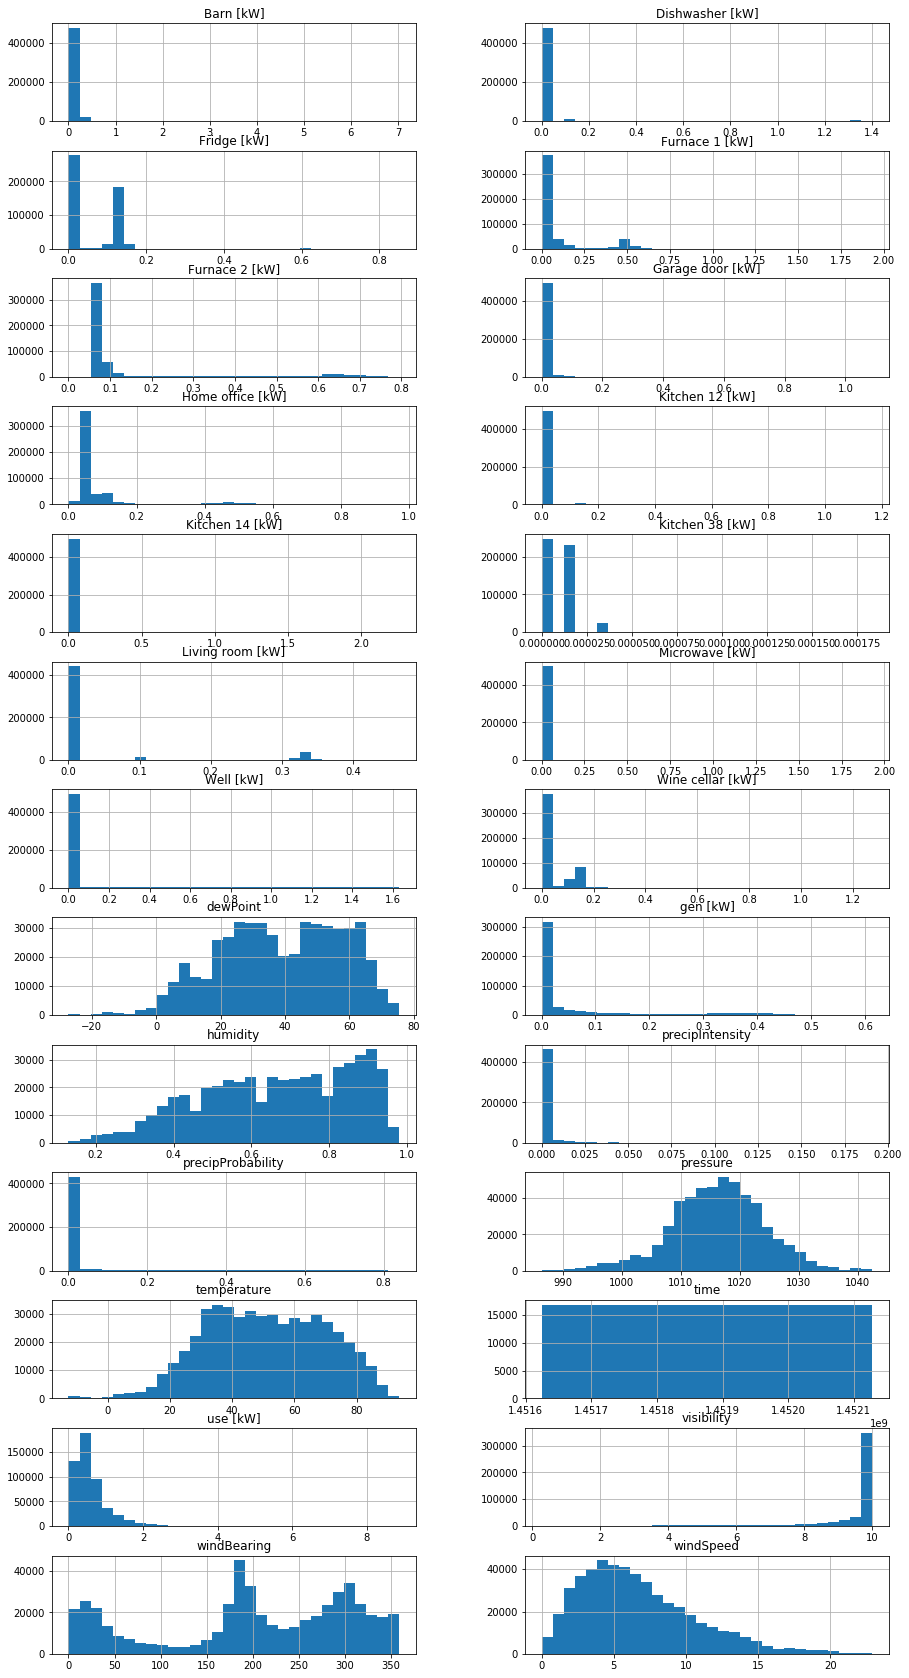

In [37]:
clean_data.hist(bins=30, figsize=(15,30), layout=(13,2))

In [39]:
from datetime import datetime

time = np.array(range(int(datetime.timestamp(datetime.strptime('1/Jan/2016 00:00:00', '%d/%b/%Y %H:%M:%S'))), int(clean_data.loc[58,'time'])))
toadd = pd.DataFrame(time, columns = ['time'])

for i in list(clean_data)[1:]:
    toadd[i] = list(clean_data[i].sample(n=len(time), replace=True))
final = pd.concat([toadd, clean_data], ignore_index=True)

time = np.array(range(int(clean_data.iloc[-1,]['time']), int(datetime.timestamp(datetime.strptime('7/Jan/2016 23:59:59', '%d/%b/%Y %H:%M:%S')))))
toadd = pd.DataFrame(time, columns = ['time'])
for i in list(clean_data)[1:]:
    toadd[i] = list(clean_data[i].sample(n=len(time), replace=True))
final = pd.concat([final,toadd], ignore_index=True)

In [40]:
datetime.fromtimestamp(final.iloc[0]['time'])

datetime.datetime(2016, 1, 1, 0, 0)

In [41]:
datetime.fromtimestamp(final.iloc[-1]['time'])

datetime.datetime(2016, 1, 7, 23, 59, 58)

In [43]:
final_filtered = final.iloc[::60, :]

In [47]:
final_filtered.shape

(10080, 26)

In [48]:
final.shape

(604800, 26)

Aggiunta di dati per arrivare ad una settimana

In [49]:
final_filtered.to_csv('clean_dataset.csv', sep=',', index = False)

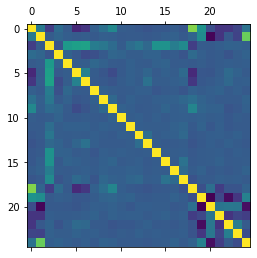

In [52]:
dataset = pd.read_csv('/Users/fabiomontello/Desktop/VAproject/clean_dataset.csv')
dataset = dataset.drop('time', axis=1)
dataset.rename(columns={
                        'Dishwasher [kW]':'D',
                        'Furnace 1 [kW]':'F1',
                        'Furnace 2 [kW]':'F2',
                        'Home office [kW]':'HO',
                        'Fridge [kW]':'F',
                        'Wine cellar [kW]':'WC',
                        'Garage door [kW]':'GD',
                        'Kitchen 12 [kW]':'K1',
                        'Kitchen 14 [kW]':'K2',
                        'Kitchen 38 [kW]':'K3',
                        'Barn [kW]':'B',
                        'Well [kW]':'W',
                        'Microwave [kW]':'M',
                        'Living room [kW]':'LR'}, 
                 inplace=True)

corrMatrix = dataset.corr(method= 'pearson')
plt.matshow(corrMatrix)
plt.show()

corrMatrix.to_csv("/Users/fabiomontello/Desktop/VAproject/correlation_m2.csv", sep=',', quoting=csv.QUOTE_NONNUMERIC)
#print (corrMatrix)

PCA test

In [56]:
final_filtered.head()

,time,dewPoint,precipProbability,use [kW],gen [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],...,Well [kW],Microwave [kW],Living room [kW],temperature,humidity,visibility,pressure,windSpeed,windBearing,precipIntensity
0,1451602800,69.83,0.00,0.367467,0.118417,0.000233,0.020050,0.080067,0.039183,0.139383,...,0.000967,0.003150,0.001650,41.83,0.94,10.00,1011.21,8.21,287,0.0000
60,1451602860,52.48,0.07,0.640833,0.003417,0.000117,0.019733,0.063583,0.039833,0.005183,...,0.000900,0.004217,0.001567,37.69,0.45,5.18,998.76,13.11,166,0.0000
120,1451602920,36.83,0.00,0.564217,0.003567,0.000017,0.181817,0.108200,0.045250,0.142033,...,0.000967,0.004000,0.001000,36.39,0.60,10.00,1020.43,10.70,321,0.0008
180,1451602980,32.05,0.00,0.272567,0.021017,0.000000,0.020467,0.063433,0.054700,0.004983,...,0.001050,0.003183,0.001583,20.75,0.79,3.87,1003.40,13.51,348,0.0020
240,1451603040,55.50,0.00,0.890183,0.003467,0.000267,0.152300,0.103483,0.061033,0.004750,...,0.001000,0.004017,0.001383,25.86,0.77,9.69,1013.51,10.83,186,0.0000


In [61]:
# Standardizing the features
import matplotlib.pyplot as plt

clean_data_np = StandardScaler().fit_transform(final_filtered.loc[:,['dewPoint', 'precipProbability', 'temperature', 'humidity', 'visibility', 'pressure', 'windSpeed', 'windBearing','precipIntensity']])

In [62]:
np.count_nonzero(np.isnan(clean_data_np))

0

In [63]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(clean_data_np)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

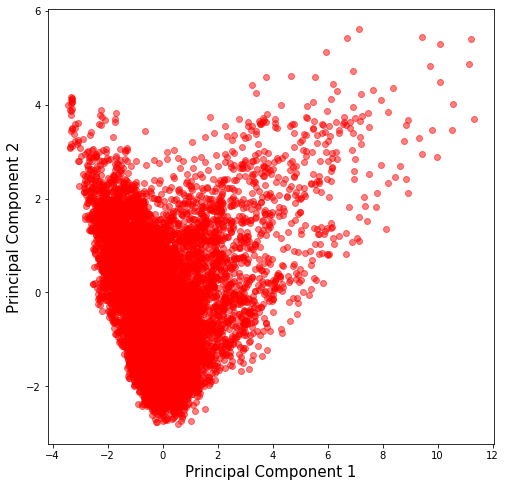

In [64]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
plt.scatter(principalComponents.T[0],principalComponents.T[1], c='red', alpha=0.5)
plt.show()
ax.grid()

In [66]:
f2 = pd.DataFrame(np.array([principalComponents.T[0], principalComponents.T[1], final_filtered['use [kW]']]).T, columns=['PC1', 'PC2', 'use'])

In [67]:
f2.to_csv('pca.csv', sep=',', header=True, index=False)

In [68]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(clean_data_np[:10000])
# X_embedded.shape

KeyboardInterrupt: 

In [40]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(clean_data_np[:1000])

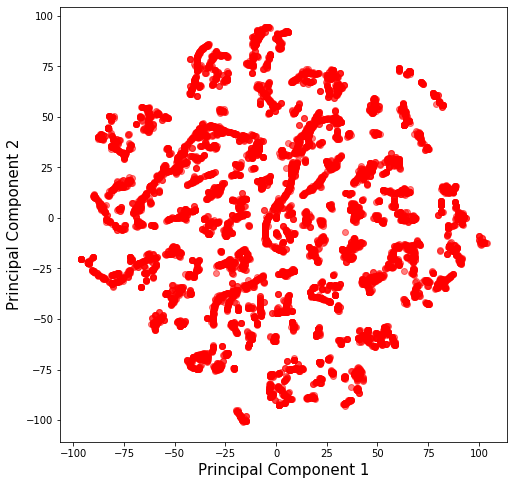

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
plt.scatter(X_embedded.T[0], X_embedded.T[1], c='red', alpha=0.5)
plt.show()
ax.grid()

In [46]:
from cuml.manifold import TSNE as cumlTSNE
tsne = cumlTSNE(n_components=2, method='barnes_hut')
tsne_embedding = tsne.fit_transform(embeddings)

ModuleNotFoundError: No module named 'cuml'